## 📍프로젝트: 인물모드 문제점 찾기

### Step1. 인물모드 직접 해 보기
- 이미지 세그멘테이션 (image segmentation)
    - 모든 픽셀에 라벨을 할당하고, 다양한 기준으로 객체 추출
 - 최소 3장
 - 동물 아웃 포커싱
 - 크로마키 배경 합성

In [52]:
# 인물모드 사진 3장

# 모듈 불러오기
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from PIL import Image

print(cv2.__version__)

4.5.3


(394, 670, 3)


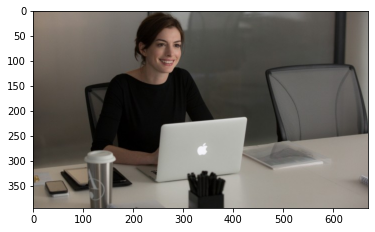

In [59]:
# 인물이 한명인 경우
img_path = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/person1.jpg'  
img_path1 = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/animal1.jpg' 

img_orig = cv2.imread(img_path) 
img_orig1 = cv2.imread(img_path1)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
#PixelLib 
# 저장할 파일 이름을 결정
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f2d0148e6d0>)

In [17]:
# 세그멘테이션 모델 생성
# PixelLib 라이브러리 에서 가져온 클래스를 가져와서 
# semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation() 

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

In [18]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

- PASCAL VOC 데이터로 학습된 모델을 이용
- 데이터의 라벨 종류
```
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
```

In [19]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

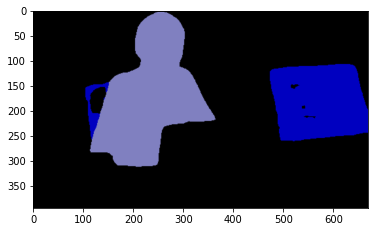

In [20]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 
# 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [21]:
# segmentAsPascalvoc() 함수를 호출하여 
# 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues 

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- 아마 검은색 배경 부분이 False고 label에 존재한 값들이 True인 배열이 출력되는 것 같다..

In [22]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [23]:

# PixelLib에서 그대로 가져온 코드
# 컬러맵 만들기 
# 컬러맵 initialize
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
# 256 pixel에 3개의 channel
print(colormap.shape)
colormap[:20] #생성한 20개의 컬러맵 출력

(256, 3)


array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15][::-1]

array([128, 128, 192])

- 현재 output 이미지가 BGR 순서로 채널 배치가 되어 있다
- colormap은 RGB 순서이다.
- 추출해야하는 색상 값은 바꿔줘야 한다.

In [25]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
#seg_color = (128,128,192)
seg_color = tuple(i for i in colormap[15][::-1])
seg_color

(128, 128, 192)

(394, 670)


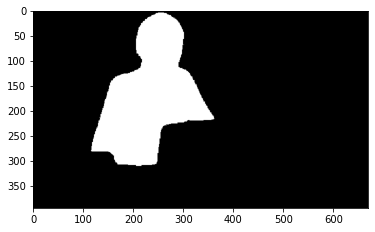

In [26]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

# np.all은 열방향으로 boolean
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

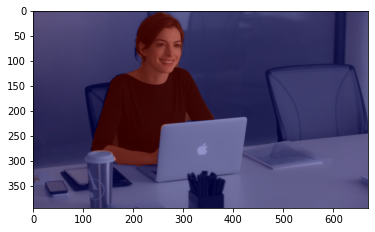

In [29]:
# 원본 이미지와 겹쳐 보기
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 합치기
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

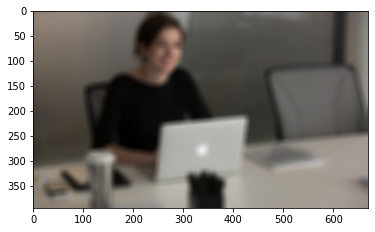

In [76]:
# (13,13)은 blurring kernel size
# 숫자를 높일 수록 블러 강도가 달라진다.
img_orig_blur = cv2.blur(img_orig, (15,15))
img_orig_blur1 = cv2.blur(img_orig1, (10,10))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

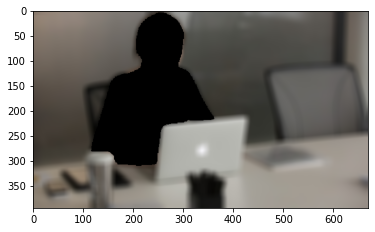

In [77]:
# 흐려진 이미지에서 세그멘 테이션 마스크 이용해서 마스크만 추출
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전, 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 반환
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0. 
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- 연산 후 반전이 되어서 사람은 0의 값이 되기 때문에 어떤 수를 연산해도 0이 된다.
- 따라서 사람이 있는 영역이 없어진다.

In [70]:
# where 절에서 모두 행렬 형상이 같아야 연산이 가능한 것으로 보인다
# 따라서 같은 크키로 조절하기
print(img_orig.shape)
print(img_bg_blur.shape)
print(img_orig1.shape)
print(img_orig1[:img_orig.shape[0],:img_orig.shape[1],:].shape)

(394, 670, 3)
(394, 670, 3)
(750, 749, 3)
(394, 670, 3)


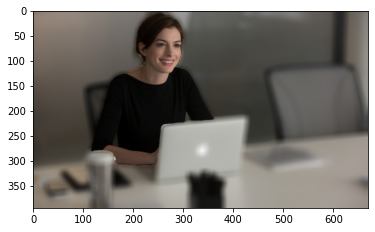

In [99]:
# 배경과 사람 합치기
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### Out focusing 함수 생성

In [7]:
import matplotlib.pyplot as plt

# 모델이 지정되어 있다는 가정 하에 out focusing 모듈 만들기
def pascal_outFocusing(img_path,label):
    #이미지 경로
    img = img_path
    img_orig = cv2.imread(img)
    
    # 모델
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

    # PixelLib
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

    # 다운로드
    urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장
    model1 = semantic_segmentation() 
    model1.load_pascalvoc_model(model_file) 
   
    #모델 불러오기
    segvalues, output = model1.segmentAsPascalvoc(img_path) 
    
    # 기존 모델에 존재하는 라벨
    LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    label_index = LABEL_NAMES.index(label)
    # 인식한 라벨
    print("인식된 라벨")
    print("=================================================")
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
    # seg_color = colormap[15]
    seg_color = (colormap[label_index][2],colormap[label_index][1],colormap[label_index][0])
    seg_map = np.all(output==seg_color, axis=-1)
    
    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꾸기
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 시각화를 위해 값 분할
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    # 전체 블러처리
    img_orig_blur = cv2.blur(img_orig, (10,10))
    
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # 연산을 하고 나면 배경은 255 사람은 0
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 배경과 사람 합치기
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용
    img_concat = np.where(img_mask_color==255, img_orig, img_orig1[:394,:670,:]) 
    
    return output, seg_map, img_show,img_concat


### 인물이 한명인 경우

Label
background
chair
person


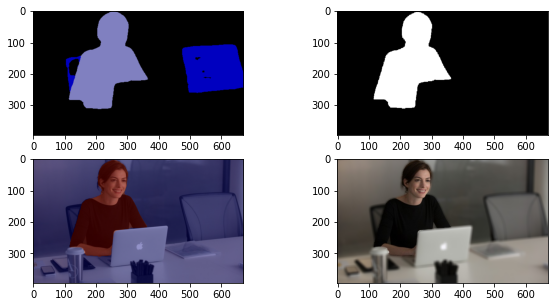

In [60]:
# 인물이 1명인 경우
img_path = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/person1.jpg'  
output1, seg_map1, img_show1,img_concat1 = pascal_outFocusing(img_path,'person')

# 인식한 부분 사진 출력
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.imshow(output1)

plt.subplot(2,2,2) 
plt.imshow(seg_map1, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))

# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

### 두명인 경우

Label
background
person
sofa


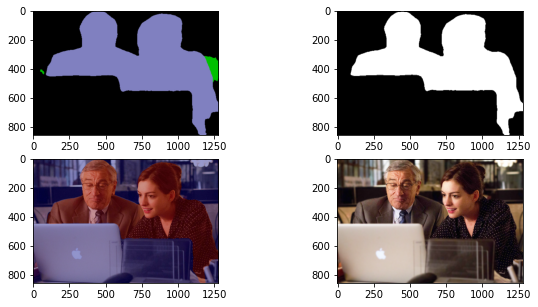

In [61]:
# 인물이 2명인 경우
img_path = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/person2.jpg'  
output2, seg_map2, img_show2,img_concat2 = pascal_outFocusing(img_path,'person')

# 인식한 부분 사진 출력
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.imshow(output2)

plt.subplot(2,2,2) 
plt.imshow(seg_map2, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))

# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

### 애니매이션 인물인 경우

Label
background
person


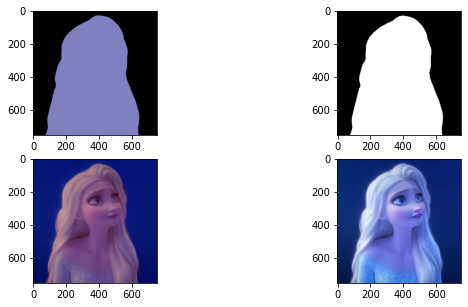

In [4]:
# 애니매이션 인물(엘사)인 경우
img_path = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/person3.jpg'  
output3, seg_map3, img_show3,img_concat3 = pascal_outFocusing(img_path,'person')

# 인식한 부분 사진 출력
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.imshow(output3)

plt.subplot(2,2,2) 
plt.imshow(seg_map3, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))

# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

### 동물인 경우

인식된 라벨
background
dog
person


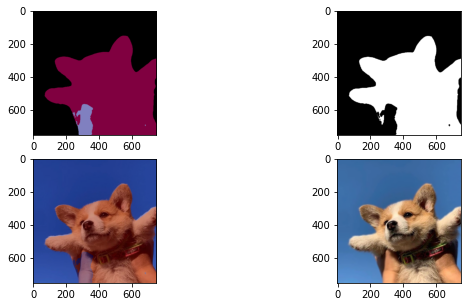

In [9]:
# 동물인 경우 (동물 아웃 포커싱)
img_path = os.getenv('HOME')+'/aiffel/Aiffel_online_Quest/Quest05/animal1.jpg'  
output4, seg_map4, img_show4,img_concat4 = pascal_outFocusing(img_path,'dog')

# 인식한 부분 사진 출력
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.imshow(output4)

plt.subplot(2,2,2) 
plt.imshow(seg_map4, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))

# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

### 크로마키 배경 합성 함수 만들기

In [73]:
# 크로마키 배경 합성
import matplotlib.pyplot as plt

# out focusing 모듈 만들기
def pascal_ChromaKey(img_path1,img_path2,label):
    #이미지 경로
    img1 = img_path1
    img_orig = cv2.imread(img1)
    img2 = img_path2
    img_orig1 = cv2.imread(img2)
    
    # 모델
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

    # PixelLib
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

    # 다운로드
    urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장
    model1 = semantic_segmentation() 
    model1.load_pascalvoc_model(model_file) 
   
    #모델 불러오기
    segvalues, output = model1.segmentAsPascalvoc(img_path) 
    
    # 기존 모델에 존재하는 라벨
    LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    label_index = LABEL_NAMES.index(label)
    # 인식한 라벨
    print("인식된 라벨")
    print("=================================================")
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
    # seg_color = colormap[15]
    seg_color = (colormap[label_index][2],colormap[label_index][1],colormap[label_index][0])
    seg_map = np.all(output==seg_color, axis=-1)
    
    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꾸기
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 시각화를 위해 값 분할
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    # 전체 블러처리
    img_orig_blur = cv2.blur(img_orig, (10,10))
    
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # 연산을 하고 나면 배경은 255 사람은 0
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 배경과 사람 합치기
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용
    img_concat = np.where(img_mask_color==255, img_orig, img_orig1[:img_orig.shape[0],:img_orig.shape[1],:]) 
    
    return img_concat


인식된 라벨
background
chair
person


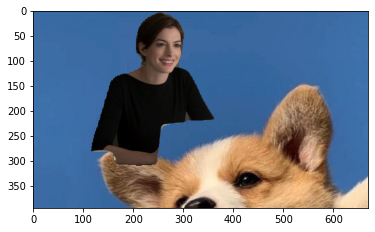

In [74]:
# 크로마키 생성
img_concat = pascal_ChromaKey(img_path,img_path1,'person')
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### Step2. 사진에서 문제점 찾기
- 주어진 사진의 문제점 찾기
- 인물 모드 사진 중 이상한 위치 표기

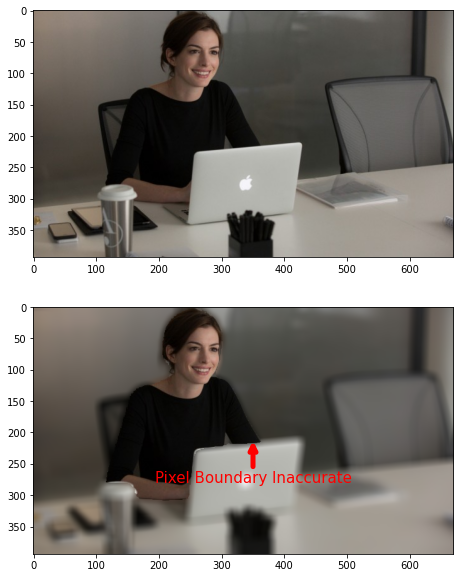

In [97]:
# 인물 모드 중 이상한 위치 표기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.annotate('Pixel Boundary Inaccurate',
             xytext=(350, 280),
             xy=(350, 210), 
             rotation=0, 
             color='red',
             ha='center', 
             va='baseline', 
             fontsize=15,
             arrowprops=dict(arrowstyle='->', color='red', lw=5)
            )
plt.show()

- 위에 사진에 표기한 것과 같이 픽셀 경계 부분이 명확하지 않은 상태로 사진이 합쳐진 것을 볼 수 있다.
- 이외에도 굳이 말하자면 디테일한 부분의 인식은 다소 떨어진다.머리카락이라던가 매우 좁은 팔 사이도 위에 cmap이 gray인 경우에 보면 인식하지 못했음을 알 수 있다.
- 즉 디테일한 인식이 떨어지고, 경계를 잘 못잡아 낸다는 것을 알 수 있다.
- 그렇다면 왜 경계를 잘 구분하지 못하는가를 집중적으로 생각해보도록 하겠다.

### Step3. 해결 방법 제안해 보기
- 해결 방법 몇가지 제시해보기
    - 문제점을 해결할 방안을 정리하여 제안하기
    - 선언적 솔루션이 아닌 모델이 Semantic segmentation이 만들어낸 Mask 영역에 어떻게 적용되어 문제점을 보안하게 되는지에 메커니즘 솔루션
- 세그멘테이션의 한계
    - Semantic segmentation의 부정확성
- 현재 시도 방법
    - 3D로 인식하려는 시도
    - 소프트웨어로 한걔 극복을 위한 시도(구글 struct2Depth)
    - 다른 기술과의 융합(적외선 카메라)

---
- Deeplabv3(우리가 사용한 모델)
    - 심층 신경망(DNN) 아키텍처
        - Atrous(확장) 컨볼루션을 사용
            - 컨볼루션 커널에 0을 삽입
            - 더 깊은 수준에서 더 밀집된 특징
            - 속도를 통해 수용 필드를 제어
            - 총 매개변수를 늘리지 않고 깊은 특징을 고해상도로 인코딩
            - but GPU 용량의 빠른 과부하
        - Atrous Spatial Pyramid Pooling
            - 여러 규모에서 기능을 다시 샘플링한 다음 함께 풀링
        - 이중선형 업샘플링
        
        
- 여전히 경계선에 대한 한계가 있으므로 좀 더 정교한 Oject boundary를 예측할 수 있는 것이 필요하다.
- 이를 해결하기 위해 확장한 매커니즘 중 하나가  Encoder와 Decoder구조에 적용하는 구조이다. DeepLabv3의 확장편 버전 DeepLabv3+에서 이 매커니즘을 사용했다.

    **- 기존 모델의 확장**
        -  Atrous Convolution, Atrous Spatial Pyramid Pooling, Depth-wise Separable Convolution을 Encoder-Decoder 구조에 적용
        - segmentation network 와 유사하게 encoder layer 중간 중간의 feature를 decoder 단에 더해주는 방식
        - High encoding된 low resolution의 feature에 high resolution 정보를 추가해주며서 boundary 예측 성능을 높여주는 역할을 수행
        -  Encoder는 입력 이미지를 저차원 특성으로 인코딩하고, Decoder는 이러한 특성을 사용하여 원래 입력 이미지의 세분화된 정보를 복원한다. 이런 구조를 사용하면 모델이 입력 이미지의 추상적인 특징을 학습할 수 있기 때문에 성능이 개선되었던 것이 아닐까 싶다.
     
    **- 가능한지 아닌지는 모르겠지만 GAN 매커니즘을 사용해서 기존에 이미지에서 경계값만 가지고 있다가 이후에 결과 값에서 서로 비교하며 개선해나가는 훈련을 통해서 경계값을 좀 더 정교하게 개선할 수 있지 않을까.. 하고 생각해보았다. 이 부분은 아직 내가 모르는 부분들이 많기 때문에 공부를 하고 나서 다시 생각해보면 좋을 것 같다**
    
    **- 아니면 처음부터 GAN이 경계값만을 잘 잡아내도록 학습하고 경계값만 생성해서 그 값을 semantic segmentation의 입력으로 사용해보는 방식도 가능할 것 같다..**
         - 기존 이미지의 정확한 경계값 정보를 레이블링한 데이터셋을 사용하여 GAN을 학습.  
             - Generator는 입력으로 원본 이미지를 받아서 semantic segmentation을 생성하며, Discriminator는 생성된 이미지와 실제 경계값 데이터가 있는 이미지 간의 차이를 학습.
         - 학습된 GAN을 사용하여 기존 이미지에 대한 새로운 semantic segmentation의 경계값을 생성
         - 생성된 경계값을 추가하여 기존의 semantic segmentation 모델을 학습
         - 잘 모르겠지만 이렇게 입력으로 넣어준 경계값에 대한 데이터가 semantic segmentation에서 encoder decoder 구조를 가지고 있다면 attention 정보의 역할을 해줄 수 있지 않을까..싶다.